In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from scipy.optimize import newton

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)
import _ressources.flux as fl


# Zero Flux

The equation for zero-hydraulic flux is given by :
$$\Delta P = -\Delta C \frac{\Lambda (\chi_s, \chi_v)}{\cosh \left( \frac{1}{2\chi_v} \right)}$$

In [2]:
def Lambda(chis, chiv) :
    c1, s1 = np.cosh(1./chis), np.sinh(1./chis)
    if chis == chiv :
        return np.cosh(0.5/chiv) * (1 - chiv*s1) / (2*chiv*s1) 
    return chis*(chis*s1*np.cosh(0.5/chiv) - chiv*(1.+c1)*np.sinh(0.5/chiv)) / (s1 * (chiv**2 - chis**2))

def zero_Jv_DelP(DelC, chis, chiv) :
    return -DelC*Lambda(chis, chiv) /np.cosh(0.5/chiv)

def Jv(DelP, DelC, chis, chiv) :
    return chiv*(DelP*np.cosh(0.5/chiv)/np.sinh(0.5/chiv) + DelC*Lambda(chis, chiv) /np.sinh(0.5/chiv))

def asymmetric_curve(Xs, Xv, dC_max = 5., nb_pts=101) :
    # RIGHT PART
    dC2_right = np.linspace(1, dC_max, nb_pts)
    dC1_right = 1
    DelC_right = dC2_right - dC1_right

    P1_right = 1

    DelP_right = zero_Jv_DelP(DelC_right, Xs, Xv)
    
    P2_right = DelP_right + P1_right
    
    Asym_dC_right = (dC2_right-dC1_right)/(dC2_right+dC1_right)
    Asym_dP_right = (P2_right-P1_right)/(P2_right+P1_right)
    
    # LEFT PART
    dC1_left = np.linspace(1, dC_max, nb_pts)
    dC2_left = 1
    DelC_left = dC2_left - dC1_left

    P2_left = 1

    DelP_left = zero_Jv_DelP(DelC_left, Xs, Xv)
    
    P1_left = P2_left - DelP_left

    Asym_dC_left = (dC2_left-dC1_left)/(dC2_left+dC1_left)
    Asym_dP_left = (P2_left-P1_left)/(P2_left+P1_left)
    
    # CONCATENATE
    Asym_dC = np.concatenate((Asym_dC_left[::-1], Asym_dC_right))
    Asym_dP = np.concatenate((Asym_dP_left[::-1], Asym_dP_right))
    return Asym_dC, Asym_dP

c_list = ['#037bfc', '#1403fc', '#2580c2', 
          '#ff4800', '#c71e1e', '#ff7c1f',
          '#00bf03', '#24bd54', '#5dba16']
lst = ['-', '--', '-.', '..']

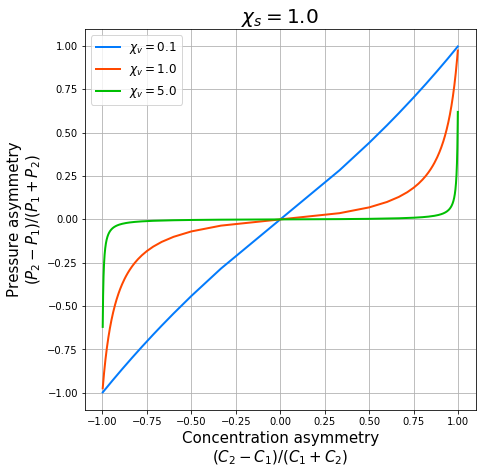

In [3]:
chis_list, chiv_list = [1.], [0.1, 1., 5.]
plt.figure(figsize=(7, 7))
c=0
for i in range(len(chis_list)) :
    ls = lst[i]
    for j in range(len(chiv_list)) :
        Asym_dC, Asym_dP = asymmetric_curve(Xs=chis_list[i], Xv=chiv_list[j], dC_max=1000., nb_pts=1001)
        plt.plot(np.copy(Asym_dC), np.copy(Asym_dP), label = r'$\chi_v=$' +str(chiv_list[j]), linewidth=2, color=c_list[c], linestyle=ls)
        c+=3
        
plt.legend(loc='upper left', fontsize=12)
plt.grid()
plt.xlabel('Concentration asymmetry\n'+r'$(C_2 - C_1) / (C_1 + C_2)$', fontsize=15)
plt.ylabel('Pressure asymmetry\n'+r'$(P_2 - P_1) / (P_1 + P_2)$', fontsize=15)
plt.title('$\chi_s = '+str(chis_list[0])+'$', fontsize=20)
#plt.savefig('/Users/mathieuleverge/git/chain_lumen/_notebook/figures/zero_flux_hydraulic_analyticsolution.eps', format='eps', dpi=100)
plt.show()



In [4]:
P1 = 1.
P2 = 5./3.
DP = P2-P1
Delta_p = DP/(P1+P2)
# ===
C1 = 1.
C2 = 10.
DC = C2-C1
Delta_c = DC/(C1+C2)

print('DP = ', DP, ' ; Delta_p = ', Delta_p)
print('DC = ', DC, ' ; Delta_c = ', Delta_c)
direction = {-1 : '1=>2', 1 : '2=>1'}
jv = Jv(DP, DC, chis=1., chiv=.1)
print('Jv = ', jv, ' ; ', direction[np.sign(jv)])

DP =  0.6666666666666667  ; Delta_p =  0.25
DC =  9.0  ; Delta_c =  0.8181818181818182
Jv =  -0.6457777002873997  ;  1=>2


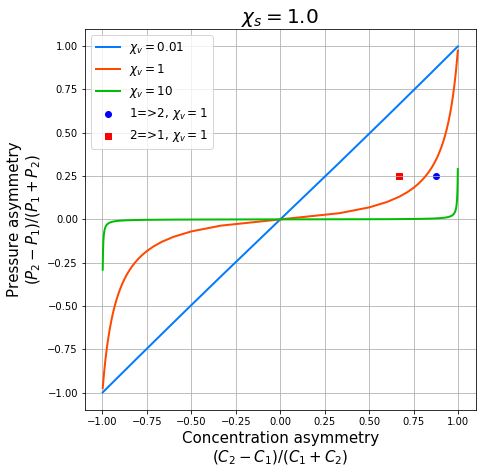

In [5]:
chis_list, chiv_list = [1.], [0.01, 1, 10]
plt.figure(figsize=(7, 7))
c=0
for i in range(len(chis_list)) :
    ls = lst[i]
    for j in range(len(chiv_list)) :
        Asym_dC, Asym_dP = asymmetric_curve(Xs=chis_list[i], Xv=chiv_list[j], dC_max=1000., nb_pts=1001)
        plt.plot(np.copy(Asym_dC), np.copy(Asym_dP), label = r'$\chi_v=$' +str(chiv_list[j]), linewidth=2, color=c_list[c], linestyle=ls)
        c+=3


# Point 1
P1, P2, C1, C2 = 1., 5./3., 1., 15.
DelP, DelC = P2-P1, C2-C1
Delta_p, Delta_c = DelP/(P2+P1), DelC/(C2+C1)
chis, chiv = 1., 1
jv = Jv(DelP, DelC, chis, chiv)
if np.sign(jv) > 0 : 
    plt.scatter(Delta_c, Delta_p, marker='o', color='red', label=r'2=>1, $\chi_v = $'+str(chiv))
else :
    plt.scatter(Delta_c, Delta_p, marker='o', color='blue', label=r'1=>2, $\chi_v = $'+str(chiv))

# Point 2    
P1, P2, C1, C2 = 1., 5./3., 1., 5
DelP, DelC = P2-P1, C2-C1
Delta_p, Delta_c = DelP/(P2+P1), DelC/(C2+C1)
chis, chiv = 1., 1
jv = Jv(DelP, DelC, chis, chiv)
if np.sign(jv) > 0 : 
    plt.scatter(Delta_c, Delta_p, marker='s', color='red', label=r'2=>1, $\chi_v = $'+str(chiv))
else :
    plt.scatter(Delta_c, Delta_p, marker='s', color='blue', label=r'1=>2, $\chi_v = $'+str(chiv))
        
plt.legend(loc='upper left', fontsize=12)
plt.grid()
plt.xlabel('Concentration asymmetry\n'+r'$(C_2 - C_1) / (C_1 + C_2)$', fontsize=15)
plt.ylabel('Pressure asymmetry\n'+r'$(P_2 - P_1) / (P_1 + P_2)$', fontsize=15)
plt.title('$\chi_s = '+str(chis_list[0])+'$', fontsize=20)
#plt.savefig('/Users/mathieuleverge/git/chain_lumen/_notebook/figures/zero_flux_hydraulic_analyticsolution.eps', format='eps', dpi=100)
plt.show()




In [6]:
def give_lab(jv):
    if jv > 0:
        return '2 => 1'
    return '1 => 2'

In [32]:
def calc_deltaC(chiv_list, P1, P2, C1, chis) :
    
    DP = P2-P1
    Pbar = P1+P2
    print(DP/Pbar)

    delC = -np.array([DP*np.cosh(.5/chiv_list[i])/Lambda(chis, chiv_list[i]) for i in range(len(chiv_list))])
    C2 = C1 + delC
    delta_C = (C2-C1)/(C2+C1)
    return delta_C

0.25


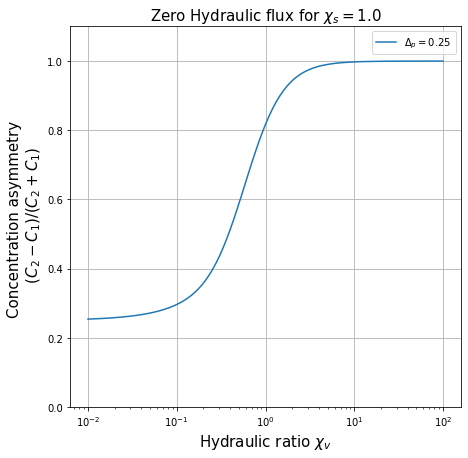

In [33]:
additionnal_curves = False
points = False

plt.figure(figsize=(7,7))
plt.xscale('log')
#plt.yscale('log')
chis = 1.
chiv_list = np.logspace(-2, 2, 101)

# First curve
C1, P1, P2 = 1., 1., 5./3.
delta_C = calc_deltaC(chiv_list, P1, P2, C1, chis)
plt.plot(chiv_list, delta_C, label = r'$\Delta_p = $'+"{:2.2f}".format((P2-P1)/(P1+P2)))

if points : 
    chiv = 1.
    
    # point 1
    C2 = 50
    y1 = (C2-C1)/(C2+C1)
    jv1 = Jv(DelP=P2-P1, DelC=C2-C1, chis=1, chiv=chiv)
    plt.scatter(chiv, y1, label=give_lab(jv1)+ r'; $\Delta_p = $' + str((P2-P1)/(P2+P1)), color='b', marker='s')

    # point 2
    C2 = 15
    y2 = (C2-C1)/(C2+C1)
    jv2 = Jv(DelP=P2-P1, DelC=C2-C1, chis=1, chiv=chiv)
    plt.scatter(chiv, y2, label=give_lab(jv2)+ r'; $\Delta_p = $' + str((P2-P1)/(P2+P1)), color='r')


if additionnal_curves :

    # Second curve
    C1, P1, P2 = 1., 1., 3
    delta_C = calc_deltaC(chiv_list, P1, P2, C1, chis)
    plt.plot(chiv_list, delta_C, label = r'$\Delta_p = $'+"{:2.2f}".format((P2-P1)/(P1+P2)), linestyle='--')

    # Third curve
    C1, P1, P2 = 1., 1., 1.1
    delta_C = calc_deltaC(chiv_list, P1, P2, C1, chis)
    plt.plot(chiv_list, delta_C, label = r'$\Delta_p = $'+"{:2.2f}".format((P2-P1)/(P1+P2)), linestyle='--')

    # Fourth curve
    C1, P1, P2 = 1., 1., 10
    delta_C = calc_deltaC(chiv_list, P1, P2, C1, chis)
    plt.plot(chiv_list, delta_C, label = r'$\Delta_p = $'+"{:2.2f}".format((P2-P1)/(P1+P2)), linestyle='--')
        
plt.ylabel('Concentration asymmetry \n '+r'$(C_2-C_1)/(C_2+C_1)$', fontsize=15)
plt.xlabel(r'Hydraulic ratio $\chi_v$', fontsize=15)
plt.grid()
plt.legend()
plt.ylim(0., 1.1)
#plt.axis('equal')

plt.title(r'Zero Hydraulic flux for $\chi_s = $'+str(chis), fontsize=15)
#plt.savefig('/Users/mathieuleverge/git/chain_lumen/_notebook/figures/zero_flux_hydraulic_dC_vs_chiv.eps', format='eps', dpi=100)
plt.show()


0.25


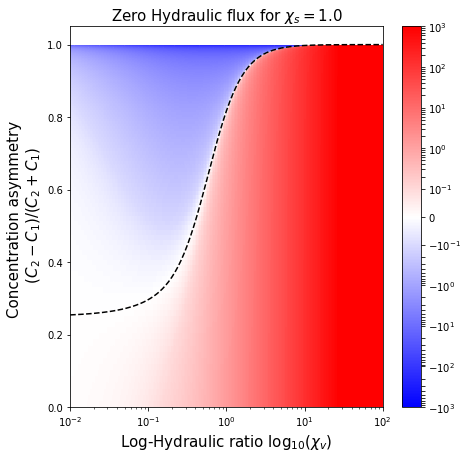

In [38]:
from matplotlib.colors import LogNorm, SymLogNorm

C1 = 1.
P1, P2 = 1., 5./3.

npts_c = 201
npts_chi = 201

chiv_list = np.logspace(-2, 2, npts_chi)
#C2_list = np.linspace(0., 1000, npts_c)
C2_list = np.logspace(0, 3, npts_c)
C2_mesh, chi_mesh = np.meshgrid(C2_list, chiv_list)

Delta_C_mesh = (C2_mesh - C1) / (C2_mesh + C1)

jv_array = np.zeros((npts_chi, npts_c))
for i in range(npts_chi) :
    for j in range(npts_c) :
        jv_array[i, j] = Jv(DelP=P2-P1, DelC=C2_mesh[i, j]-C1, chis=1, chiv=chi_mesh[i, j])

delta_C = calc_deltaC(chiv_list, P1, P2, C1, chis)        
        
fig, ax = plt.subplots(figsize=(7, 7))

ax.set_title(r'Zero Hydraulic flux for $\chi_s = $'+str(chis), fontsize=15)

pcm = ax.pcolormesh(chi_mesh, Delta_C_mesh, jv_array,
                       norm=SymLogNorm(linthresh=1e-1, linscale=1, vmin=-1e3, vmax=1e3),
                    cmap='bwr', rasterized=False)

ax.set_xscale('log')

# First curve
plt.plot(chiv_list, delta_C, label = r'$\Delta_p = $'+"{:2.2f}".format((P2-P1)/(P1+P2)), color='k', linestyle='--')

fig.colorbar(pcm, ax=ax)

ax.set_ylabel('Concentration asymmetry \n '+r'$(C_2-C_1)/(C_2+C_1)$', fontsize=15)
ax.set_xlabel(r'Log-Hydraulic ratio $\log_{10}(\chi_v)$', fontsize=15)
#ax.grid()
#plt.savefig('/Users/mathieuleverge/git/chain_lumen/_notebook/figures/zero_flux_hydraulic_dC_vs_chiv.eps', format='eps', dpi=100)
plt.show()


